<a href="https://colab.research.google.com/github/ParulHarshana/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment

## Import Libraries

In [213]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,PowerTransformer
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.decomposition import PCA





## Upload Dataset

In [214]:
data=pd.read_csv('/content/marketing_campaign.csv',sep='\t')

In [215]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [217]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [218]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## Data Preprocessing

In [219]:
## Taking out age from Birth Year column
data['Age']=2024-data['Year_Birth']

In [220]:
### Treating the Outliers in Age
## We will use Z-Score method here as the data is normally distributed
mu=data['Age'].mean()
sigma=data['Age'].std()
ul,ll=mu+3*sigma,mu-3*sigma
data[(data['Age']>ul)|(data['Age']<ll)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,124
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,131
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,125


In [221]:
### Caping the outliers in Age column
data['Age']=data['Age'].apply(lambda x: ul if x>ul else x)


In [222]:
## Creating Age Bins
def Age_bins(Age):
  if Age<30:
    return '<30'
  elif Age<40:
    return '30-40'
  elif Age<50:
    return '40-50'
  elif Age<60:
    return '50-60'
  elif Age<70:
    return '60-70'
  elif Age<80:
    return '70-80'
  else:
     return '>80'


In [223]:
data['Age_Bins']=data['Age'].apply(Age_bins)

In [224]:
## Treating Marital Status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [225]:
data['Marital_Status']=data['Marital_Status'].replace({'Together':'Married','Single':'Alone','Absurd':'Alone','YOLO':'Alone',\
                                                       'Divorced':'Alone','Widow':'Alone'})
data['Marital_Status'].unique()

array(['Alone', 'Married'], dtype=object)

In [226]:
## Treating Education
data['Education']=data['Education'].replace({'Basic':'Graduation','2n Cycle':'Master'})    ### Doubt

In [227]:
### Finding out total children
data['Children']=data['Kidhome']+data['Teenhome']
data['Children'].unique()

array([0, 2, 1, 3])

In [228]:
## Total members in the family
step=data['Marital_Status'].replace({'Married':2,'Alone':1})
data['Family_Size']=step+data['Children']


In [229]:
## Total amount spent by the customers
data['Total_Spent']=data['MntFishProducts']+data['MntFruits']+data['MntGoldProds']\
+data['MntMeatProducts']+data['MntSweetProducts']+data['MntWines']


In [230]:
## Total no. of purchases made by different modes
data['Total_Num_Purchases']=data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebPurchases']

In [231]:
## Total no. of offers accepted by the customer across all campaigns
data['Total_Camp_Accepted']=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']

In [232]:
### Dropping unnecessary columns
data.drop(['Z_CostContact','Z_Revenue','ID'],axis=1,inplace=True)

In [233]:
print(f'No. of rows before dropping null values {data.shape[0]}')

No. of rows before dropping null values 2240


In [234]:
## Dropping na values
data.dropna(inplace=True)

In [235]:
print(f'No. of rows after dropping null values {data.shape[0]}')

No. of rows after dropping null values 2216


## Univariate analysis

In [236]:
cat_cols=[ 'Age_Bins','Education', 'Marital_Status', 'Children',
       'Family_Size','Total_Camp_Accepted']

In [237]:
num_cols=['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Income','Total_Spent', 'Total_Num_Purchases',]

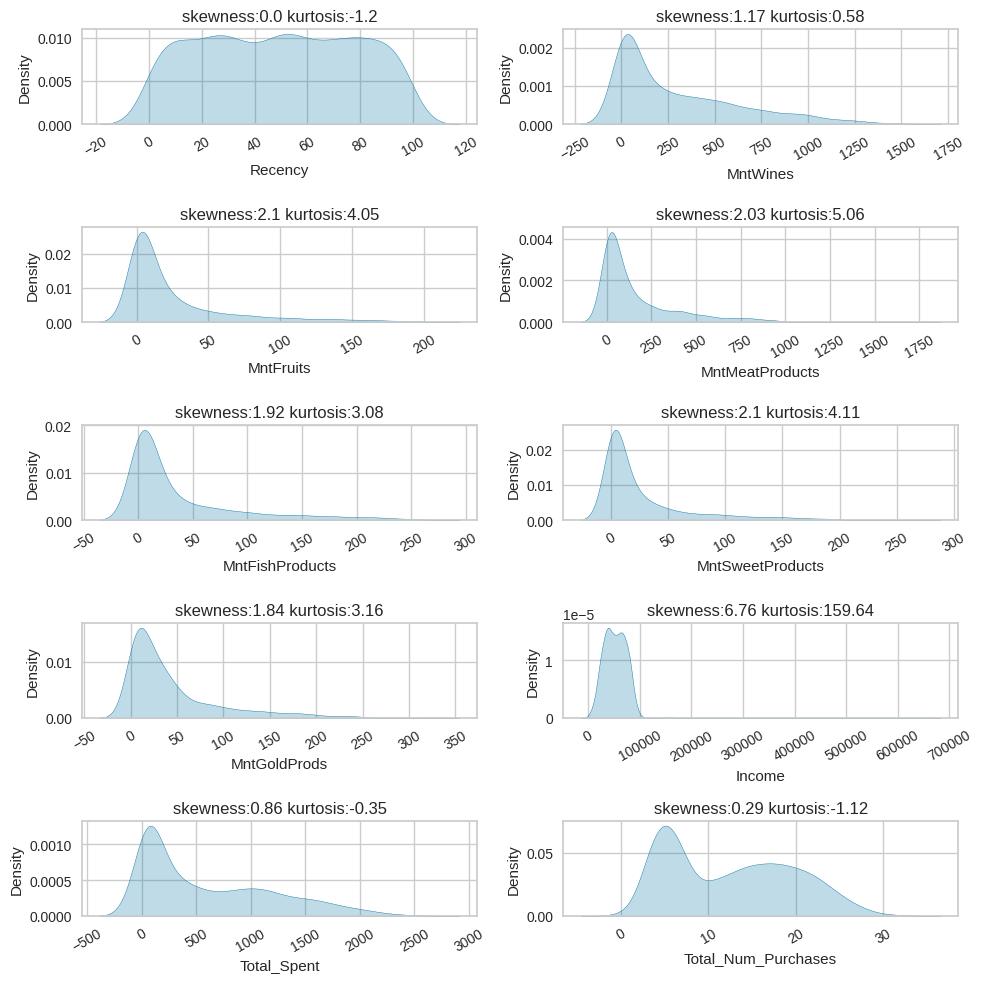

In [238]:
t=1
plt.figure(figsize=(10,10))
for i in num_cols:
  plt.subplot(5,2,t)
  s,k=data[i].skew(),data[i].kurt()
  sns.kdeplot(data=data,x=i,fill=True)
  plt.title(f'skewness:{round(s,2)} kurtosis:{round(k,2)}')
  plt.xticks(rotation=30)
  t+=1
plt.tight_layout()
plt.show()

A majority of customers have low incomes,but a very small percentage earn significantly high, leading to extreme skewness and kurtosis.


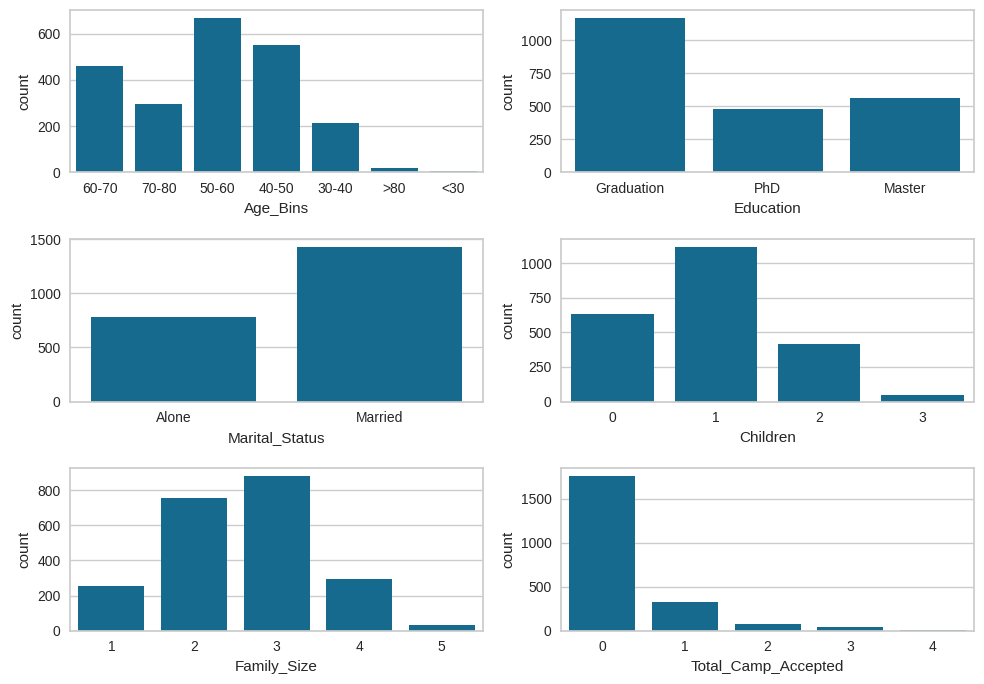

In [240]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
  plt.subplot(3,2,t)
  sns.countplot(data=data,x=i)
  plt.xticks(fontsize=10)
  t+=1
plt.tight_layout()
plt.show()

Most of the people lie in the age group of 40-60.

Highest qualification that most of the people have is graduation.






In [241]:
cat_cols2=['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

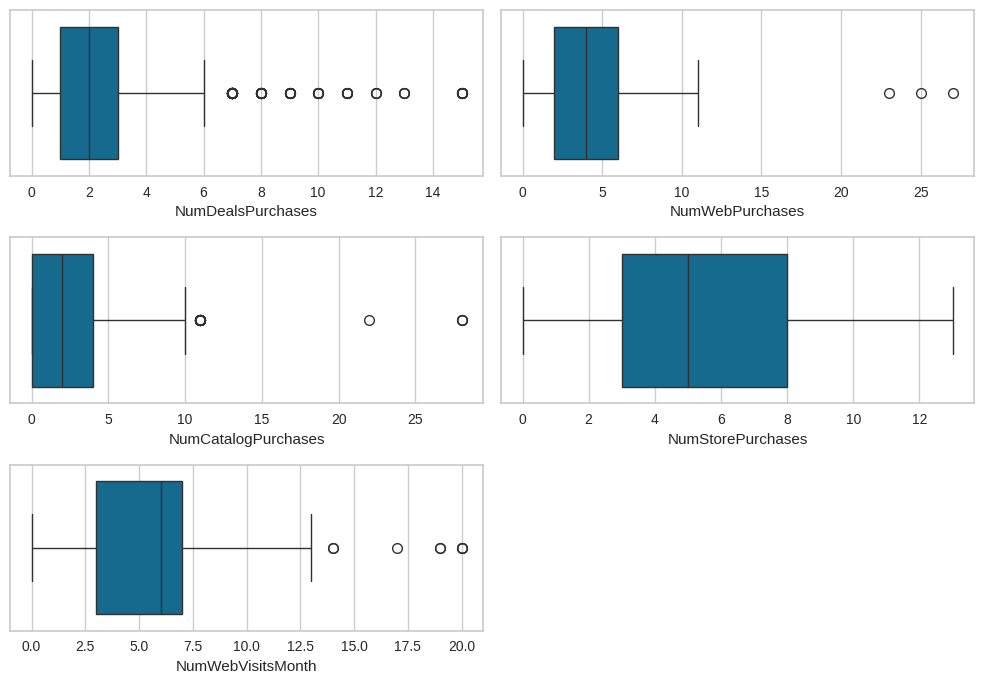

In [242]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols2:
  plt.subplot(3,2,t)
  sns.boxplot(data=data,x=i)
  t+=1
plt.tight_layout()
plt.show()

In [243]:
cat_cols3=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain']

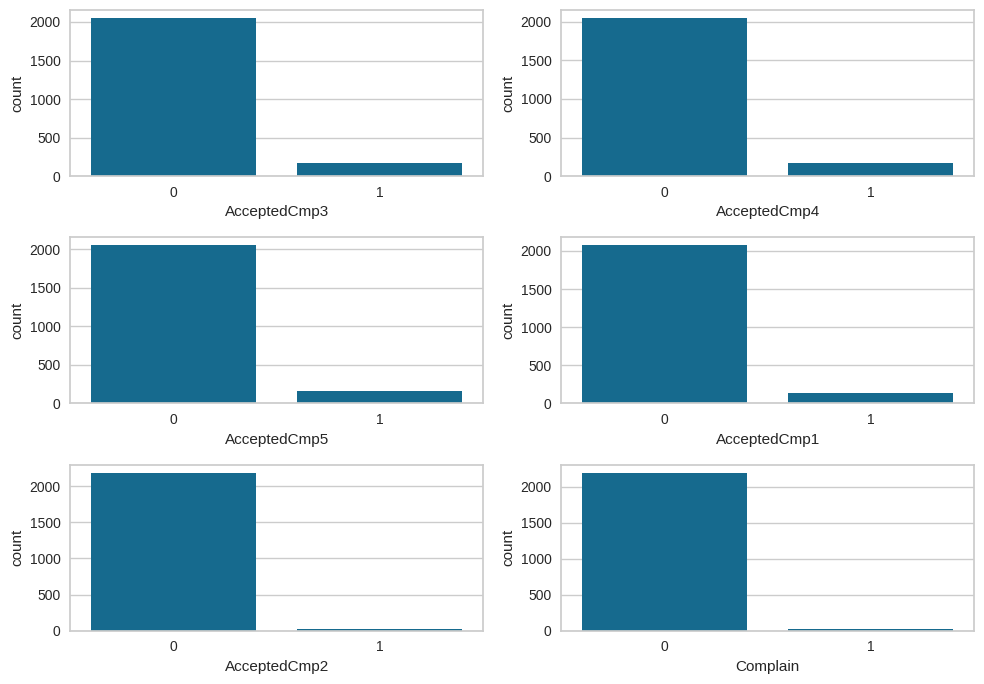

In [244]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols3:
  plt.subplot(3,2,t)
  sns.countplot(data=data,x=i)
  t+=1
plt.tight_layout()
plt.show()


## Bivariate Analysis

In [245]:
## Cat Vs Cat

<Figure size 1000x700 with 0 Axes>

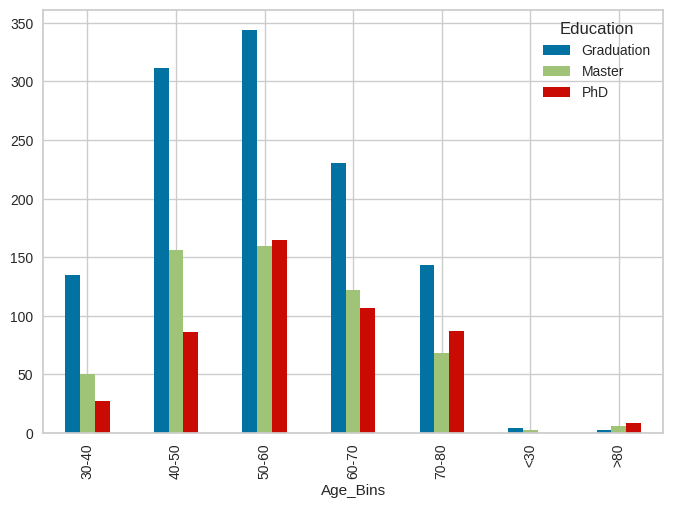

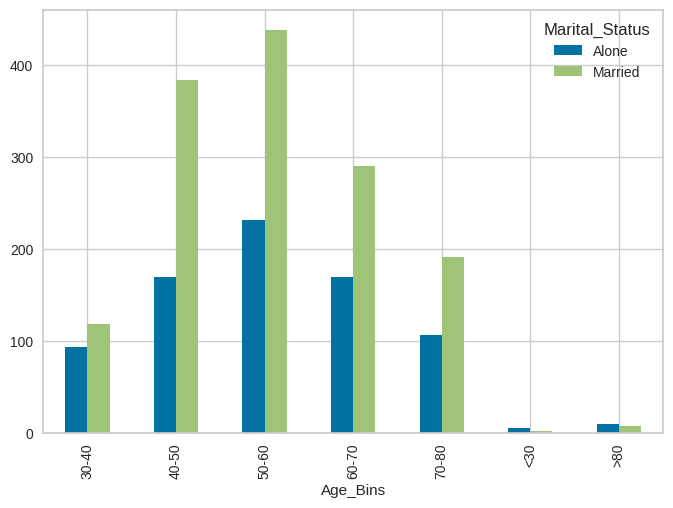

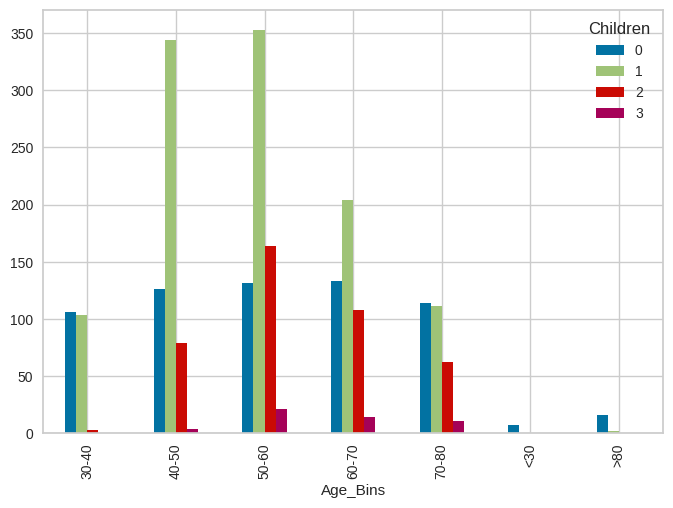

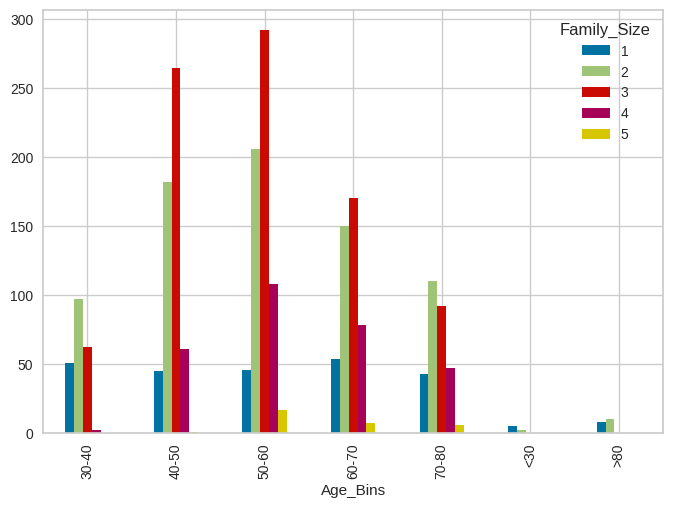

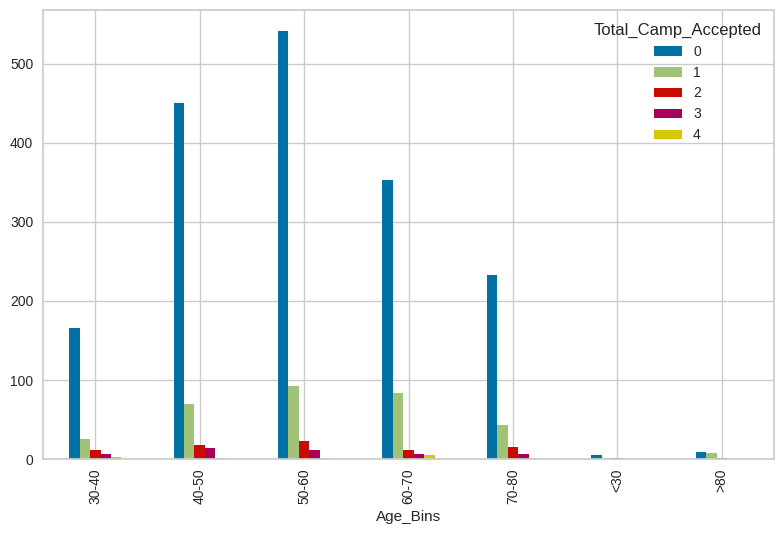

In [246]:

plt.figure(figsize=(10,7))
for i in cat_cols:
  if i!='Age_Bins':
    pd.crosstab(index=data['Age_Bins'],columns=data[i]).plot(kind='bar')
plt.tight_layout()
plt.show()

In [247]:
amt=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Income']

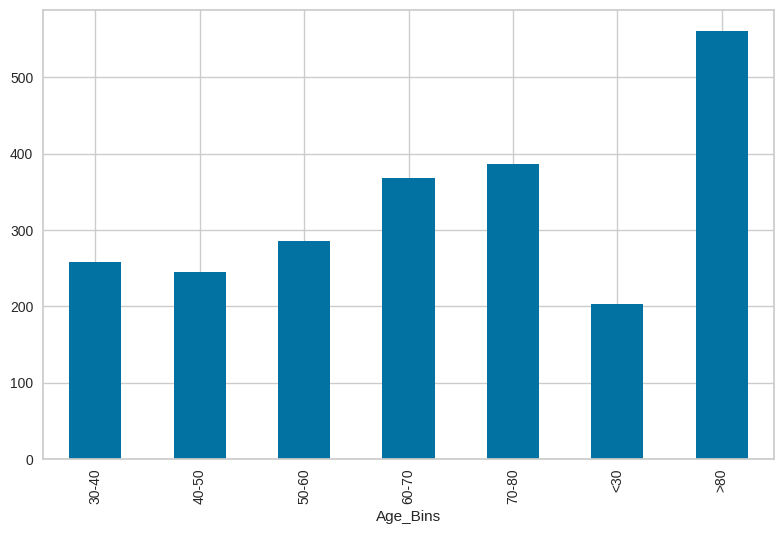

In [248]:
data.groupby(by='Age_Bins')['MntWines'].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

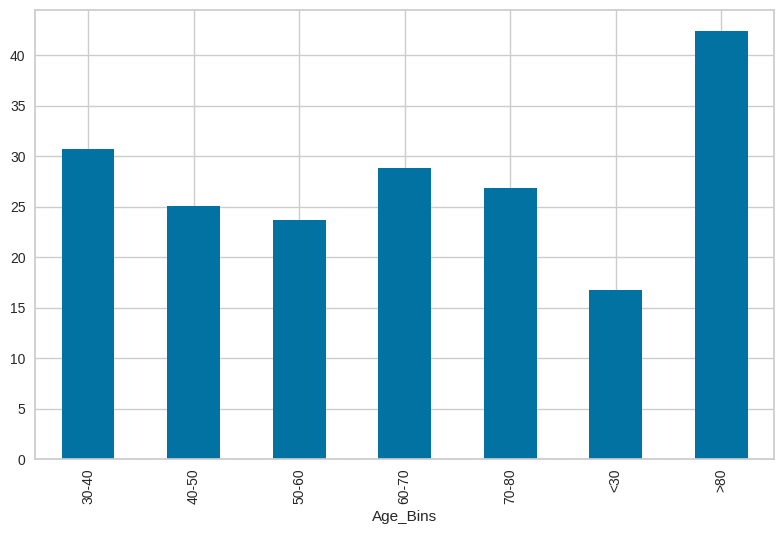

In [249]:

data.groupby(by='Age_Bins')['MntFruits'].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

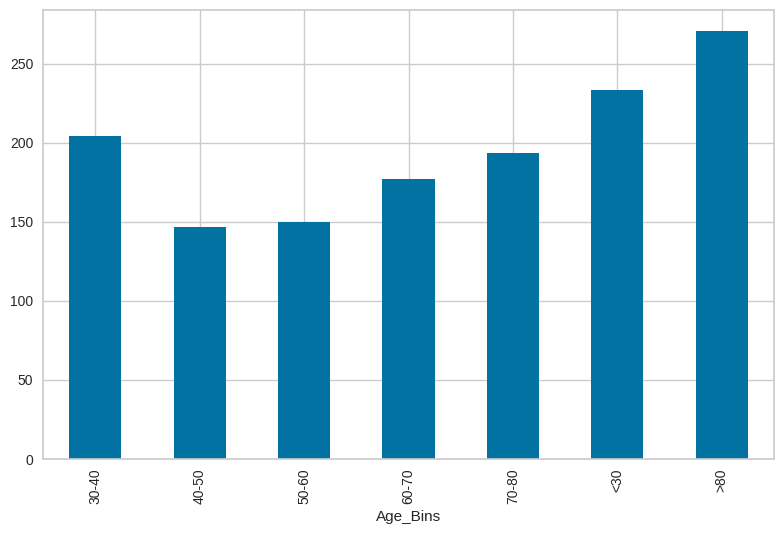

In [250]:
data.groupby(by='Age_Bins')['MntMeatProducts'].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

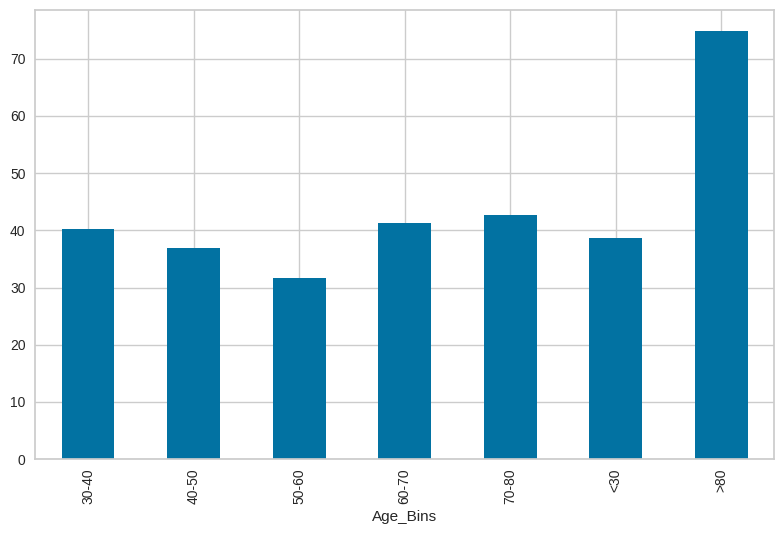

In [251]:
data.groupby(by='Age_Bins')['MntFishProducts'].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

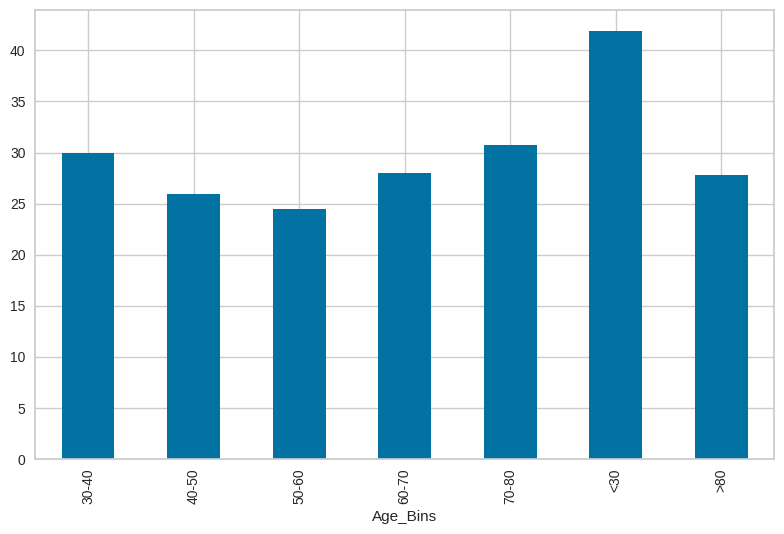

In [252]:
data.groupby(by='Age_Bins')['MntSweetProducts'].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

The age group that spends the most on sweet products is less then 30.

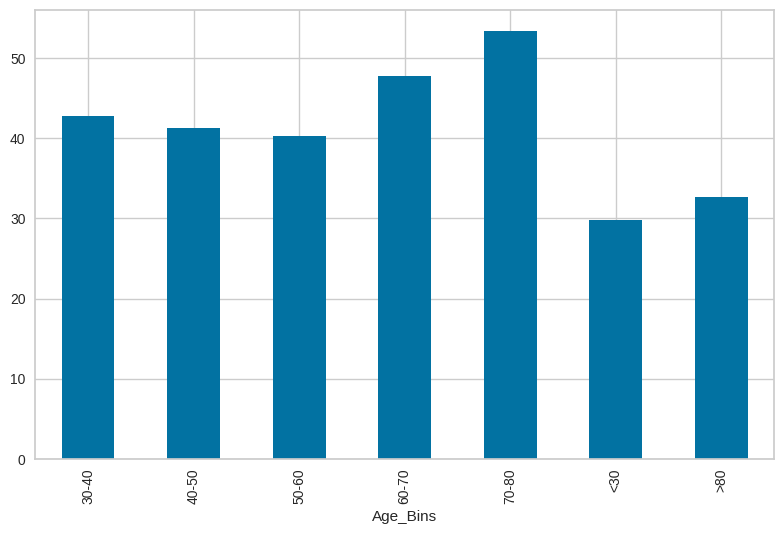

In [253]:
data.groupby(by='Age_Bins')['MntGoldProds'].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

In [254]:
## Num Vs Cat

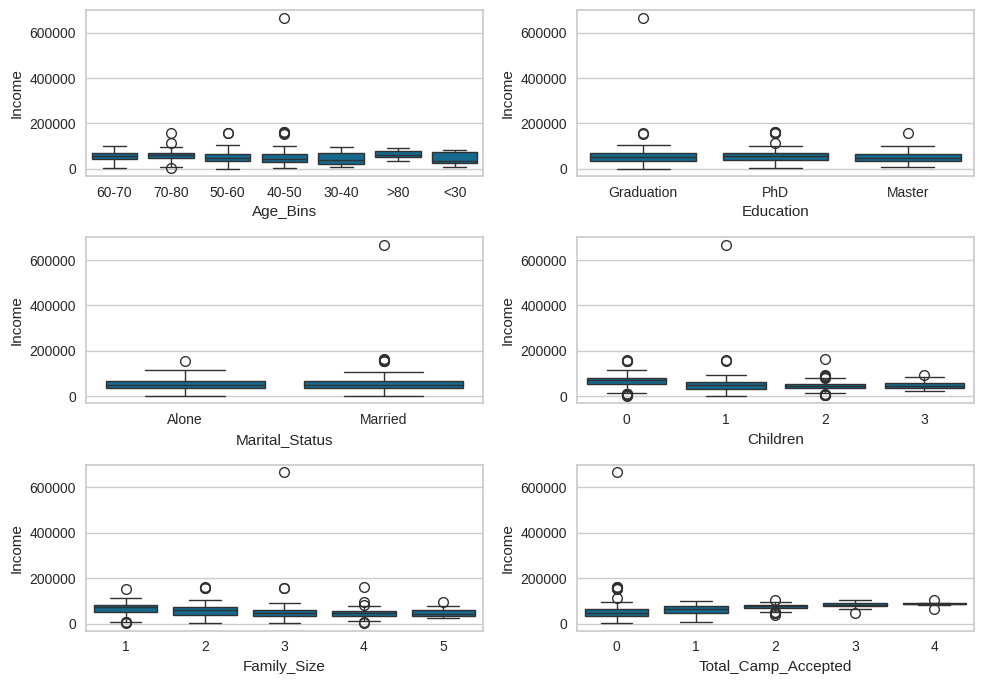

In [255]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
  plt.subplot(3,2,t)
  sns.boxplot(data=data,x=i,y='Income')
  plt.xticks(fontsize=10)
  t+=1
plt.tight_layout()
plt.show()


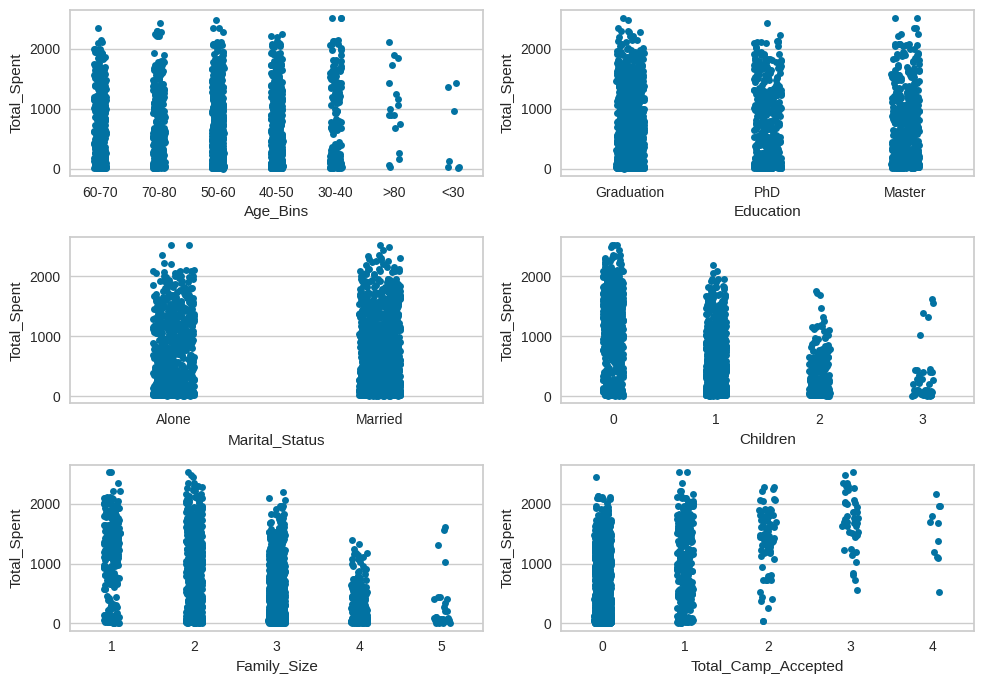

In [256]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
  plt.subplot(3,2,t)
  sns.stripplot(data=data,x=i,y='Total_Spent')
  plt.xticks(fontsize=10)
  t+=1
plt.tight_layout()
plt.show()

As we can see the total spent is less for age group less then 30 and greater then 80.

People with 0 or 1 child spend more as compared to people with 2 or more children.


In [257]:
## Num vs Num

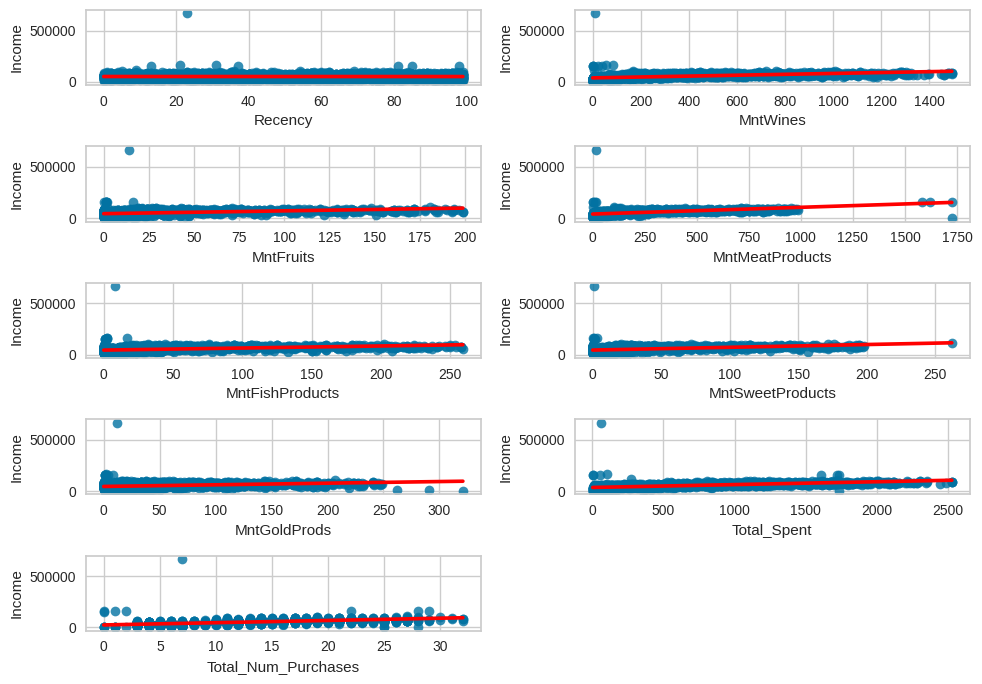

In [258]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
  if i!='Income':
    plt.subplot(5,2,t)
    sns.regplot(data=data,x=i,y='Income',line_kws={'color':'red'})
    t+=1

plt.tight_layout()
plt.show()

Most red regression lines are almost flat, suggesting a weak or no linear relationship between Income and the corresponding variables.


## Feature Engineering

#### Drop unnecessary column

In [259]:
data.drop(['Year_Birth','Kidhome','Teenhome','Dt_Customer'],axis=1,inplace=True)

In [260]:
data.drop(['Age_Bins'],axis=1,inplace=True)

#### N-1 Dummy Encoding

In [261]:
data=pd.get_dummies(data,columns=['Education'],drop_first=True,dtype='int')

#### One Hot Encoding

In [262]:
data=pd.get_dummies(data,columns=['Marital_Status'],dtype='int')

In [263]:
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,Children,Family_Size,Total_Spent,Total_Num_Purchases,Total_Camp_Accepted,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married
0,58138.0,58,635,88,546,172,88,88,3,8,...,67.0,0,1,1617,22,0,0,0,1,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,70.0,2,3,27,4,0,0,0,1,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,59.0,0,2,776,20,0,0,0,0,1
3,26646.0,26,11,4,20,10,3,5,2,2,...,40.0,1,3,53,6,0,0,0,0,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,43.0,1,3,422,14,0,0,1,0,1


#### Feature Scalling

In [264]:
scale_cols=['Income','Recency','MntWines','MntMeatProducts','MntFruits','MntFishProducts','MntSweetProducts',\
          'MntGoldProds','Total_Spent','Age']

In [265]:
scaler=RobustScaler()
data[scale_cols]=scaler.fit_transform(data[scale_cols])

#### Feature Transformation

In [266]:
transformer= PowerTransformer(method='yeo-johnson')
transformed_data=transformer.fit_transform(data)

## Inferential Statistics

In [267]:
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,Children,Family_Size,Total_Spent,Total_Num_Purchases,Total_Camp_Accepted,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married
0,0.203393,0.18,0.957380,2.580645,2.210405,3.404255,2.50000,1.351064,3,8,...,0.722222,0,1,1.246680,22,0,0,0,1,0
1,-0.151645,-0.22,-0.339917,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,2,1,...,0.888889,2,3,-0.377426,4,0,0,0,1,0
2,0.609034,-0.46,0.522869,1.322581,0.272832,2.106383,0.40625,0.372340,1,8,...,0.277778,0,2,0.387640,20,0,0,0,0,1
3,-0.744619,-0.46,-0.339917,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,2,2,...,-0.777778,1,3,-0.350868,6,0,0,0,0,1
4,0.208059,0.90,-0.003119,1.129032,0.231214,0.723404,0.59375,-0.202128,5,5,...,-0.611111,1,3,0.026047,14,0,0,1,0,1


### Hypothesis Testing

#### Num Vs Num

Income And Spending Behavior

Ho: There is no relation between Income and Spending Behavior

Ha: There is a relation between Income and Spending Behavior

In [268]:
t_stat,pvalue=stats.pearsonr(data['Income'],data['Total_Spent'])

In [269]:
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


AS we can see the pvalue is less then alpha(0.05), We  reject the null hypothesis i.e there is a  relation between income and spending behavior of the customers

In [270]:
Pvalue=[]
filtered_index=[x for x in num_cols if x!='Income']
for i in num_cols:
  if i!= 'Income':
    t_stats,pval=stats.pearsonr(data['Total_Spent'],data[i])
    Pvalue.append(pval)
pval_df=pd.DataFrame(Pvalue,columns=['Pvalue'],index=filtered_index).\
sort_values(by='Pvalue')
significant_features = pval_df[pval_df['Pvalue'] < 0.05]
print(" Statistically significant variables (p < 0.05):\n")
print(significant_features)

 Statistically significant variables (p < 0.05):

                            Pvalue
MntWines              0.000000e+00
MntMeatProducts       0.000000e+00
Total_Spent           0.000000e+00
Total_Num_Purchases   0.000000e+00
MntFishProducts      3.964497e-258
MntFruits            4.504358e-229
MntSweetProducts     2.760430e-223
MntGoldProds         7.674774e-160


## Cat vs Num


Total Members In Family And Spending Behavior

Ho: There is no relation between Family Size and Spending Behavior

Ha: There is a relation between Family Size and Spending Behavior

In [271]:
group1=data[data['Family_Size']==1]['Total_Spent']
group2=data[data['Family_Size']==2]['Total_Spent']
group3=data[data['Family_Size']==3]['Total_Spent']

t_stat,pvalue=stats.f_oneway(group1,group2,group3)
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


As we reject the null hypothesis, we can say there is a significant relation between familiy_size and Total spending.

Education and spending Behavior

Ho: The mean spending behavior is the same for people with Graduation, Masters, or PhD education.

Ha: The mean spending behavior is the different for people with Graduation, Masters, or PhD education.


In [272]:
group1 = data[data['Education_Master'] == 1]['Total_Spent']
group2 = data[data['Education_PhD'] == 1]['Total_Spent']
group3 = data[(data['Education_Master'] == 0) & (data['Education_PhD'] == 0)]['Total_Spent']  # assumed Graduation

t_stat, pvalue = stats.f_oneway(group1, group2, group3)

if pvalue < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


AS we reject the null hypthesis, we can say the mean spending behavior is the different for people with Graduation, Masters, or PhD education.

## Modeling and evaluation


#### As we are going to use PCA(Pricipal Component Analysis), we have to scale the whole data.

In [273]:
scaler=RobustScaler()
scaled_data=scaler.fit_transform(data)

In [274]:
data=pd.DataFrame(scaled_data,columns=data.columns)

### Reduce the data using PCA

In [275]:
pca=PCA(n_components=15)
pca.fit(scaled_data)

PCA(n_components=15)

In [276]:
## Lets see how many PC's we can have
## As per kasier criterion we can have 3 PC's
pca.explained_variance_

array([6.30438491, 1.510304  , 1.08898308, 0.87887493, 0.71705434,
       0.68877981, 0.58923788, 0.50245312, 0.46486833, 0.41047276,
       0.33932562, 0.31940712, 0.26420844, 0.22534044, 0.21027489])

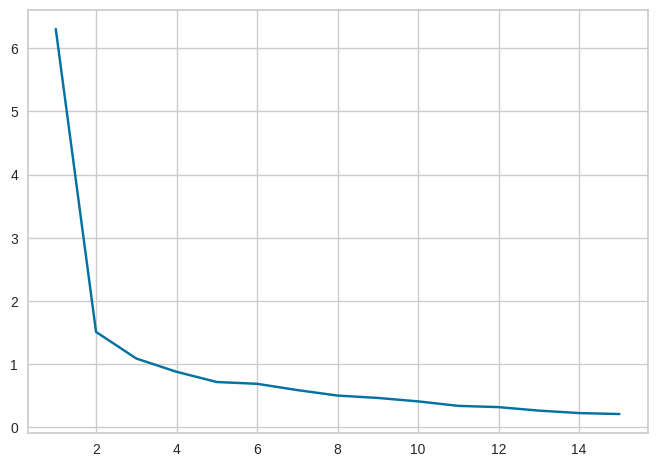

In [277]:
## Lets see a scree plot
plt.plot(range(1,16),pca.explained_variance_)
plt.show()

In [278]:
## Explained variance percentage
## Lets use PC's that explains 90% variance
pca.explained_variance_ratio_.cumsum()

array([0.41183652, 0.51049774, 0.58163601, 0.63904887, 0.68589074,
       0.73088556, 0.76937776, 0.80220072, 0.83256843, 0.85938273,
       0.88154932, 0.90241472, 0.91967424, 0.9343947 , 0.94813099])

Here we are going to use 12 PCA's

In [279]:
pca_final=PCA(n_components=12)
pca_data=pd.DataFrame(pca_final.fit_transform(scaled_data),columns=range(1,13))

#### KMeans Clustering

In [280]:
## Lets decide the value of k

## K-Elbow plot
kelbow=KElbowVisualizer(estimator=KMeans(),k=10)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

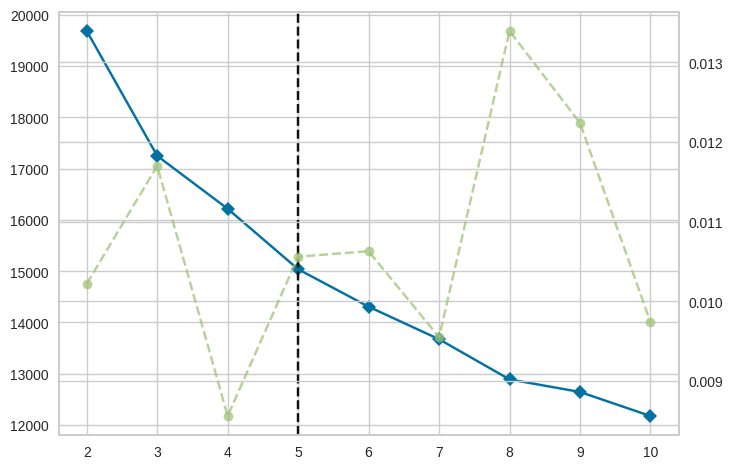

In [281]:
kelbow.fit(pca_data)

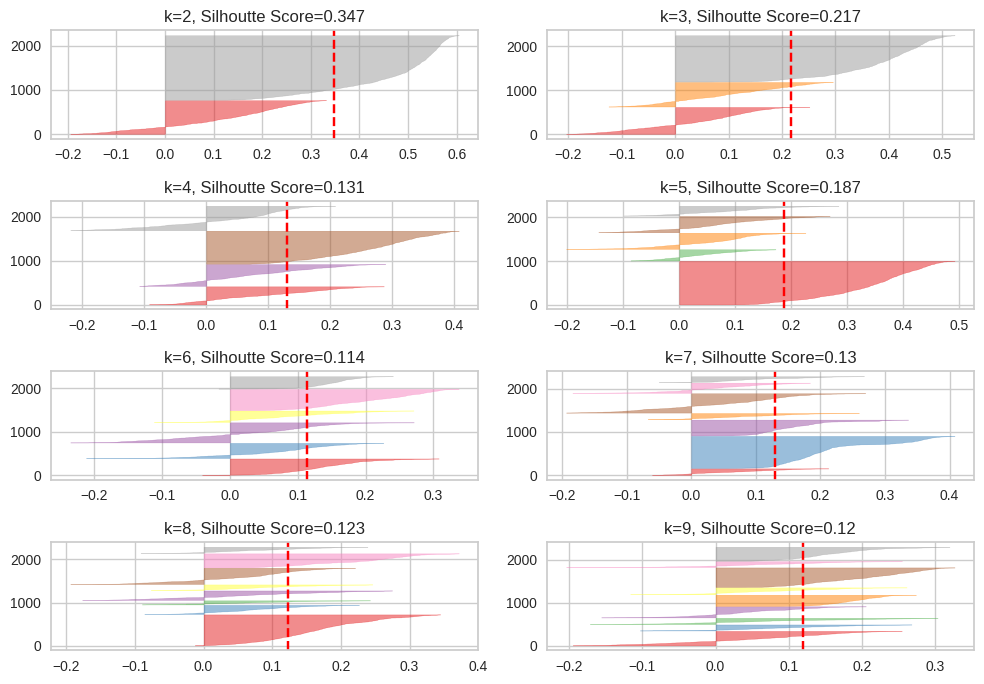

In [282]:
## Silhouette visualiser
t=1
plt.figure(figsize=(10,7))
for i in range(2,10):
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(data)
    plt.title(f'k={i}, Silhoutte Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

In [283]:
kmeans=KMeans(n_clusters=2,random_state=42)
lables=kmeans.fit_predict(data)

In [284]:
data['Labels']=lables

In [285]:
data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Children,Family_Size,Total_Spent,Total_Num_Purchases,Total_Camp_Accepted,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Labels
0,0.203393,0.18,0.957380,2.580645,2.210405,3.404255,2.50000,1.351064,0.5,1.00,...,-1.0,-2.0,1.246680,0.833333,0.0,0.0,0.0,1.0,-1.0,1
1,-0.151645,-0.22,-0.339917,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,0.0,-0.75,...,1.0,0.0,-0.377426,-0.666667,0.0,0.0,0.0,1.0,-1.0,0
2,0.609034,-0.46,0.522869,1.322581,0.272832,2.106383,0.40625,0.372340,-0.5,1.00,...,-1.0,-1.0,0.387640,0.666667,0.0,0.0,0.0,0.0,0.0,1
3,-0.744619,-0.46,-0.339917,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,0.0,-0.50,...,0.0,0.0,-0.350868,-0.500000,0.0,0.0,0.0,0.0,0.0,0
4,0.208059,0.90,-0.003119,1.129032,0.231214,0.723404,0.59375,-0.202128,1.5,0.25,...,0.0,0.0,0.026047,0.166667,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.296261,-0.06,1.111227,1.129032,0.527168,0.638298,3.43750,4.734043,0.0,1.25,...,0.0,0.0,0.964760,0.333333,0.0,0.0,0.0,0.0,0.0,1
2212,0.380279,0.14,0.481289,-0.258065,-0.175723,-0.255319,-0.25000,-0.351064,2.5,1.00,...,2.0,2.0,0.048519,0.250000,1.0,0.0,1.0,0.0,0.0,0
2213,0.168563,0.84,1.524948,1.290323,0.689017,0.425532,0.12500,-0.010638,-0.5,-0.50,...,-1.0,-2.0,0.862615,0.500000,1.0,0.0,0.0,1.0,-1.0,1
2214,0.537749,-0.82,0.527027,0.709677,0.675145,1.446809,0.68750,0.776596,0.0,0.50,...,0.0,0.0,0.456078,0.750000,0.0,1.0,0.0,0.0,0.0,1


In [286]:
data.groupby('Labels').mean().T

Labels,0,1
Income,-0.308886,0.669039
Recency,-0.003898,0.008221
MntWines,-0.043800,0.876760
MntFruits,-0.024819,1.776446
MntMeatProducts,-0.100582,1.529643
MntFishProducts,-0.036800,1.663247
MntSweetProducts,-0.025159,1.784461
MntGoldProds,0.024497,1.162153
NumDealsPurchases,0.296156,-0.096179
NumWebPurchases,-0.175189,0.398551


AS we can see from above label 1 are group of people with high spending across all products and have high income. So we can call them high spenders.

whereas label 0 are group of people with low income and are spending less. They also rely more on discounts. So we can call them budget conscious spenders.

In [292]:
data['Labels']=data['Labels'].replace({0:'Budget_Conscious',1:'High_Spenders'})
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Children,Family_Size,Total_Spent,Total_Num_Purchases,Total_Camp_Accepted,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Labels
0,0.203393,0.18,0.957380,2.580645,2.210405,3.404255,2.50000,1.351064,0.5,1.00,...,-1.0,-2.0,1.246680,0.833333,0.0,0.0,0.0,1.0,-1.0,High_Spenders
1,-0.151645,-0.22,-0.339917,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,0.0,-0.75,...,1.0,0.0,-0.377426,-0.666667,0.0,0.0,0.0,1.0,-1.0,Budget_Conscious
2,0.609034,-0.46,0.522869,1.322581,0.272832,2.106383,0.40625,0.372340,-0.5,1.00,...,-1.0,-1.0,0.387640,0.666667,0.0,0.0,0.0,0.0,0.0,High_Spenders
3,-0.744619,-0.46,-0.339917,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,0.0,-0.50,...,0.0,0.0,-0.350868,-0.500000,0.0,0.0,0.0,0.0,0.0,Budget_Conscious
4,0.208059,0.90,-0.003119,1.129032,0.231214,0.723404,0.59375,-0.202128,1.5,0.25,...,0.0,0.0,0.026047,0.166667,0.0,0.0,1.0,0.0,0.0,Budget_Conscious
